In [1]:
import numpy as np
import pandas as pd
import spektral

In [2]:
np.random.seed(42)

In [3]:
pathway = pd.read_csv("hsa05211_pathway.csv")
pathway.rename(columns={"Unnamed: 0": "idx"}, inplace=True)

In [4]:
pathway

,idx,from,to,type,subtype
0,1,hsa:5781,hsa:5594,PPrel,indirect effect
1,2,hsa:5781,hsa:5595,PPrel,indirect effect
2,3,hsa:405,hsa:2034,PPrel,binding/association
3,4,hsa:405,hsa:3091,PPrel,binding/association
4,5,hsa:9915,hsa:2034,PPrel,binding/association
...,...,...,...,...,...
108,109,hsa:5894,hsa:5605,PPrel,phosphorylation
109,110,hsa:673,hsa:5604,PPrel,activation
110,111,hsa:673,hsa:5604,PPrel,phosphorylation
111,112,hsa:673,hsa:5605,PPrel,activation


In [5]:
import os 

path = '/Users/ishitamed/Downloads/GCN_Dataset/CSV/'
os.listdir(path)

['Log_transformed_889_RCC.csv',
 'KIRP_290_tumors_log_transformed.csv',
 '.DS_Store',
 'Clinical_KICH_81_tumors.csv',
 'KIRC_518_tumors_log_transformed.csv',
 'KICH_81_tumors_log_transformed.csv',
 'Log_transformed_25_KICH_normal.csv',
 'Clinical_KIRP_290_tumors.csv',
 'Log_transformed_129_normal.csv',
 'Clinical_KIRC_518_tumors.csv',
 'Log_transformed_72_KIRC_normal.csv',
 'Log_transformed_32_KIRP_normal.csv']

In [6]:
def load_dataset(path, filename, transpose=True):
    '''
        Loads the dataset and converts into its transpose with appropriate columns
    '''
    df = pd.read_csv(os.path.join(path, filename))
    df.rename(columns={"Unnamed: 0": "pid"}, inplace=True)
    if transpose:
        df = df.astype({"pid": str})
        df = df.T
        new_header = df.iloc[0] 
        df = df[1:]
        df.columns = new_header
    return df

In [7]:
df_kirp = load_dataset(path,'KIRP_290_tumors_log_transformed.csv',transpose=True)
df_kirc = load_dataset(path,'KIRC_518_tumors_log_transformed.csv',transpose=True)
df_kich = load_dataset(path,'KICH_81_tumors_log_transformed.csv',transpose=True)

In [8]:
df_kirp['y'] = 0
df_kirc['y'] = 1
df_kich['y'] = 2

In [9]:
data = pd.concat([df_kirp, df_kirc, df_kich])

In [10]:
data

pid,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,11130,7789,158586,79364,440590,79699,7791,23140,26009,y
TCGA-2K-A9WE,0,2.59679,2.75228,5.79911,9.61253,0,8.20371,0,0,0,...,7.55048,4.8189,7.50224,10.2856,1.61103,9.57221,13.1108,10.5605,9.93522,0
TCGA-2Z-A9J1,0,3.17612,3.67643,6.19717,10.1783,0,7.66327,0,0,0,...,7.6057,4.91841,7.43853,9.92169,1.31429,9.00269,12.6,10.3448,8.4931,0
TCGA-2Z-A9J2,0,1.94931,2.11527,4.90228,10.3464,0,6.28195,0,0,0,...,7.83897,4.75582,7.12681,9.74123,1.16279,8.65696,12.7855,9.63509,8.43738,0
TCGA-2Z-A9J3,0,2.76666,2.59753,6.24673,9.81382,0,9.38455,0.445621,0,0,...,8.7991,5.00565,7.39412,10.3487,0,8.83842,13.0534,10.1111,9.30753,0
TCGA-2Z-A9J5,0,1.20777,3.05617,6.24278,10.2727,0,7.81579,0.835358,0,0,...,7.46504,3.67409,6.92818,9.72935,1.74541,8.81007,12.4673,10.1546,8.91459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BP-4994,0,2.66505,3.66125,6.29367,9.42055,0,6.83102,1.37473,0,0,...,6.62133,7.26878,9.5991,10.89,1.04411,10.8615,10.6078,10.3058,9.62504,2
TCGA-B0-4688,0,3.89335,3.6834,5.72368,9.12061,0,7.78298,1.50396,5.08968,0,...,8.82246,6.20389,8.91646,9.25762,0.79452,9.85502,12.2808,11.1702,9.92699,2
TCGA-B0-4696,0,4.05197,4.57621,6.30959,9.38998,0,8.69391,0.597031,6.31145,0,...,10.1245,6.70077,9.13638,8.69569,1.01799,9.85832,12.7399,9.64492,10.0795,2
TCGA-B0-4699,0,2.91608,3.30334,5.85481,9.95274,0,7.63986,1.47913,0,0,...,9.087,6.2496,8.97293,10.501,3.24673,10.6398,11.7414,9.99253,9.58994,2


In [11]:
genes_used = set()

for i in range(len(pathway)):
    genes_used.add(pathway.iloc[i]['from'][4:])
    genes_used.add(pathway.iloc[i]['to'][4:])

In [12]:
to_remove = []
for gene in genes_used:
    if gene not in data.columns:
        to_remove.append(gene)

In [13]:
for gene in to_remove:
    genes_used.remove(gene)
genes_used = list(genes_used)

In [14]:
for gene in to_remove:
    pathway = pathway[pathway['from']!=("hsa:"+str(gene))]
    pathway = pathway[pathway['to']!=("hsa:"+str(gene))]

In [15]:
nodes = len(genes_used)
edges = len(pathway)

In [16]:
nodes, edges

(55, 111)

In [17]:
genes_used.sort()

In [18]:
# dict to map gene_id to node_number
node_map = {}
count = 0
for gene in genes_used:
    node_map[("hsa:"+str(gene))] = count
    count += 1

In [19]:
node_map

{'hsa:10000': 0,
 'hsa:10298': 1,
 'hsa:112398': 2,
 'hsa:112399': 3,
 'hsa:1387': 4,
 'hsa:1398': 5,
 'hsa:1399': 6,
 'hsa:2033': 7,
 'hsa:2034': 8,
 'hsa:207': 9,
 'hsa:208': 10,
 'hsa:2113': 11,
 'hsa:2549': 12,
 'hsa:2885': 13,
 'hsa:2889': 14,
 'hsa:3082': 15,
 'hsa:3091': 16,
 'hsa:369': 17,
 'hsa:3725': 18,
 'hsa:405': 19,
 'hsa:4233': 20,
 'hsa:5058': 21,
 'hsa:5062': 22,
 'hsa:5063': 23,
 'hsa:5155': 24,
 'hsa:5290': 25,
 'hsa:5291': 26,
 'hsa:5293': 27,
 'hsa:5295': 28,
 'hsa:5296': 29,
 'hsa:54583': 30,
 'hsa:5594': 31,
 'hsa:5595': 32,
 'hsa:5604': 33,
 'hsa:5605': 34,
 'hsa:56924': 35,
 'hsa:57144': 36,
 'hsa:572': 37,
 'hsa:5781': 38,
 'hsa:5879': 39,
 'hsa:5894': 40,
 'hsa:5906': 41,
 'hsa:5908': 42,
 'hsa:6513': 43,
 'hsa:6654': 44,
 'hsa:6655': 45,
 'hsa:673': 46,
 'hsa:7039': 47,
 'hsa:7040': 48,
 'hsa:7042': 49,
 'hsa:7043': 50,
 'hsa:7422': 51,
 'hsa:8503': 52,
 'hsa:9915': 53,
 'hsa:998': 54}

## Create adjacency matrix

In [20]:
adjacency_matrix = np.zeros((nodes,nodes))

In [21]:
for i in range(edges):
    n1 = pathway.iloc[i]['from']
    n2 = pathway.iloc[i]['to']
    n1 = node_map[n1]
    n2 = node_map[n2]
    adjacency_matrix[n1][n2] = 1

In [22]:
adjacency_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
adjacency_matrix.shape

(55, 55)

In [24]:
from scipy import sparse
A = sparse.csr_matrix(adjacency_matrix)

In [25]:
A.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## Create node features matrix

In [26]:
X = data[genes_used]

In [27]:
X = X.to_numpy()
X = X.T

In [28]:
X

array([[9.15260427895225, 8.73043277438035, 8.04926046332519, ...,
        9.45358753933941, 10.0572065531123, 8.55607298957492],
       [10.2330444012656, 11.3456325558529, 10.3532240318824, ...,
        9.329202099016449, 10.5715251309464, 11.3560062175436],
       [10.554253079053401, 10.6850991720066, 10.8393061591129, ...,
        9.958333757156698, 10.470089410577, 11.1719398603242],
       ...,
       [8.83650803033427, 8.78656369179624, 9.51807478161928, ...,
        10.3666719161118, 10.5155815797454, 8.922688457336019],
       [9.47662875872076, 9.09187434314344, 7.7751229905654595, ...,
        4.815862299921401, 11.212210614512301, 8.29448290520082],
       [12.181189535325599, 12.371904575773002, 12.1992827891219, ...,
        13.265352794367699, 12.543851080924302, 11.408165185591098]],
      dtype=object)

In [29]:
X.shape

(55, 889)

## Create target label matrix

NOT NEEDED THO

In [30]:
OneHot = False

if OneHot:
    y = []
    for i in data['y']:
        if i==0:
            y.append([1,0,0])
        elif i==1:
            y.append([0,1,0])
        elif i==2:
            y.append([0,0,1])
else:
    y = data['y']

In [31]:
y = np.asarray(y)

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
y.shape

(889,)

In [36]:
data['y'].to_csv("patient_labels.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## split data into train and val

In [34]:
# from sklearn.model_selection import train_test_split

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

## Model

In [38]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from spektral.layers import GraphConv
from spektral.layers.ops import sp_matrix_to_sp_tensor
from spektral.layers import ChebConv

In [39]:
tf.compat.v1.disable_eager_execution()

In [40]:
# Parameters
l2_reg = 5e-4         # Regularization rate for l2
learning_rate = 5e-4  # Learning rate for SGD
batch_size = 32       # Batch size
epochs = 50         # Number of training epochs
es_patience = 0      # Patience fot early stopping
channels = 16           # Number of channels in the first layer
K = 2  

In [41]:
# X_train, X_test = X_train[..., None], X_test[..., None]
# N = X_train.shape[-2]      # Number of nodes in the graphs
# F = X_train.shape[-1]      # Node features dimensionality
n_out = 3                  # Dimension of the target

In [42]:
# X_train.shape, X_test.shape

In [43]:
fltr = ChebConv.preprocess(A).astype('f4')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/spektral/utils/convolution.py:30: RuntimeWarning: divide by zero encountered in power
  degrees = np.power(np.array(A.sum(1)), k).flatten()


In [44]:
fltr.shape

(55, 55)

In [45]:
# # Model definition
# X_in = Input(shape=(N, F))
# A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr))

# # dropout_1 = Dropout(dropout)(X_in)
# graph_conv_1 = ChebConv(16,
#                         K=K,
#                         activation='relu',
#                         kernel_regularizer=l2(l2_reg),
#                         use_bias=False)([X_in, A_in])
# # dropout_2 = Dropout(dropout)(graph_conv_1)
# graph_conv_2 = ChebConv(16,
#                         K=K,
#                         activation='relu',
#                         use_bias=False)([graph_conv_1, A_in])
# flatten = Flatten()(graph_conv_2)
# fc_1 = Dense(512, activation='relu')(flatten)
# dropout_1 = Dropout(0.3)(fc_1)
# fc_2 = Dense(128, activation='relu')(dropout_1)
# output = Dense(n_out, activation='softmax')(fc_2)



In [46]:
# # Build model
# model = Model(inputs=[X_in, A_in], outputs=output)
# optimizer = Adam(lr=learning_rate)
# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])
# model.summary()

In [47]:
# # Train model
# validation_data = (X_test, y_test)
# model.fit(X_train,
#           y_train,
#           batch_size=batch_size,
#           validation_data=validation_data,
#           epochs=12)

In [48]:
# from sklearn.metrics import classification_report
# y_true = y_test
# y_pred = model.predict(X_test, verbose=1)
# y_p = []
# for row in y_pred:
#     y_p.append(np.argmax(row))
# target_names = ['kirp 0', 'kirc 1', 'kich 2']
# print(classification_report(y_true, y_p, target_names=target_names))

## Stratified K-fold CV

In [49]:
f1_weighted_per_fold = []
f1_macro_per_fold = []
f1_micro_per_fold = []
testacc_per_fold = []
precision_per_fold = []
recall_per_fold = []

f1_weighted_per_level = []
f1_macro_per_level = []
f1_micro_per_level = []
testacc_per_level = []
precision_per_level=[]
recall_per_level=[]

In [50]:
model_per_fold = []

In [51]:
## from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import precision_score, recall_score

kfold1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
kfold2 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

fold = 1

for train_idx_1, test_idx_1 in kfold2.split(X.T, y):
    X_train, X_test = X.T[train_idx_1], X.T[test_idx_1]
    X_train, X_test = X_train[..., None], X_test[..., None]
    y_train, y_test = y[train_idx_1], y[test_idx_1]
    f1_weighted_per_fold = []
    f1_macro_per_fold = []
    f1_micro_per_fold = []
    testacc_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    for train_ix, test_ix in kfold1.split(X_train, y_train):
        train_X, test_X = X_train[train_ix], X_train[test_ix]
        train_y, test_y = y_train[train_ix], y_train[test_ix]

        N = X_train.shape[-2]      # Number of nodes in the graphs
        F = X_train.shape[-1]      # Node features dimensionality

        # Model definition
        X_in = Input(shape=(N, F))
        A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr))

        # dropout_1 = Dropout(dropout)(X_in)
        bn_1 = BatchNormalization()(X_in)
        graph_conv_1 = ChebConv(32,
                                K=K,
                                activation='relu',
                                kernel_regularizer=l2(l2_reg),
                                use_bias=False)([bn_1, A_in])
        # dropout_2 = Dropout(dropout)(graph_conv_1)
        bn_2 = BatchNormalization()(graph_conv_1)
        graph_conv_2 = ChebConv(32,
                                K=K,
                                activation='relu',
                                use_bias=False)([bn_2, A_in])
        flatten = Flatten()(graph_conv_2)
        fc_1 = Dense(64, activation='relu')(flatten)
        dropout_1 = Dropout(0.3, seed=42)(fc_1)
        fc_2 = Dense(32, activation='relu')(dropout_1)
        output = Dense(n_out, activation='softmax')(fc_2)

        # Build model
        model = Model(inputs=[X_in, A_in], outputs=output)
        optimizer = Adam(lr=learning_rate)
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['acc'])


        # Train model
        validation_data = (test_X, test_y)
        model.fit(train_X,
                  train_y,
                  batch_size=16,
                  validation_data=validation_data,
                  epochs=10)

        y_pred = model.predict(X_test, verbose=1)
        y_p = []
        for row in y_pred:
            y_p.append(np.argmax(row))
        target_names = ['0', '1', '2']
        print("Fold: ", fold)
        fold += 1
        print(classification_report(y_test, y_p, target_names=target_names))
        f1_weighted_per_fold.append(f1_score(y_test, y_p, average='weighted'))
        f1_macro_per_fold.append(f1_score(y_test, y_p, average='macro'))
        f1_micro_per_fold.append(f1_score(y_test, y_p, average='micro'))
        testacc_per_fold.append(accuracy_score(y_test, y_p))
        precision_per_fold.append(precision_score(y_test, y_p,  average='micro'))
        recall_per_fold.append(recall_score(y_test, y_p,  average='micro'))
        
    f1_weighted_per_level.append(np.mean(f1_weighted_per_fold))
    f1_macro_per_level.append(np.mean(f1_macro_per_fold))
    f1_micro_per_level.append(np.mean(f1_micro_per_fold))
    testacc_per_level.append(np.mean(testacc_per_fold))
    precision_per_level.append(np.mean(precision_per_fold))
    recall_per_level.append(np.mean(recall_per_fold))

W0609 16:03:27.825738 4729851328 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:1666: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 531 samples, validate on 61 samples
Epoch 1/10
531/531 [==============================] - 0s 495us/sample - loss: 0.4680 - acc: 0.8136 - val_loss: 1.6266 - val_acc: 0.6393
Epoch 2/10
531/531 [==============================] - 0s 271us/sample - loss: 0.2466 - acc: 0.9416 - val_loss: 1.9471 - val_acc: 0.0984
Epoch 3/10
531/531 [==============================] - 0s 242us/sample - loss: 0.2141 - acc: 0.9379 - val_loss: 1.6930 - val_acc: 0.1148
Epoch 4/10
531/531 [==============================] - 0s 276us/sample - loss: 0.1784 - acc: 0.9586 - val_loss: 0.8854 - val_acc: 0.6230
Epoch 5/10
531/531 [==============================] - 0s 228us/sample - loss: 0.1504 - acc: 0.9529 - val_loss: 0.7516 - val_acc: 0.6230
Epoch 6/10
531/531 [==============================] - 0s 227us/sample - loss: 0.1739 - acc: 0.9473 - val_loss: 0.6830 - val_acc: 0.6721
Epoch 7/10
531/531 [==============================] - 0s 226us/sample - loss: 0.1537 - acc: 0.9510 - val_loss: 0.4621 - val_acc: 0.8852
Epo

534/534 [==============================] - 0s 586us/sample - loss: 0.2370 - acc: 0.9307 - val_loss: 1.3260 - val_acc: 0.5862
Epoch 3/10
534/534 [==============================] - 0s 435us/sample - loss: 0.1950 - acc: 0.9476 - val_loss: 1.1481 - val_acc: 0.5862
Epoch 4/10
534/534 [==============================] - 0s 413us/sample - loss: 0.1870 - acc: 0.9345 - val_loss: 1.0180 - val_acc: 0.6379
Epoch 5/10
534/534 [==============================] - 0s 495us/sample - loss: 0.1860 - acc: 0.9476 - val_loss: 1.0928 - val_acc: 0.6207
Epoch 6/10
534/534 [==============================] - 0s 366us/sample - loss: 0.1713 - acc: 0.9494 - val_loss: 0.9221 - val_acc: 0.6552
Epoch 7/10
534/534 [==============================] - 0s 270us/sample - loss: 0.1582 - acc: 0.9532 - val_loss: 0.7163 - val_acc: 0.7241
Epoch 8/10
534/534 [==============================] - 0s 843us/sample - loss: 0.1307 - acc: 0.9644 - val_loss: 0.4515 - val_acc: 0.8276
Epoch 9/10
534/534 [==============================] - 0s 41

534/534 [==============================] - 0s 355us/sample - loss: 0.2019 - acc: 0.9419 - val_loss: 0.9048 - val_acc: 0.6379
Epoch 4/10
534/534 [==============================] - 0s 456us/sample - loss: 0.1769 - acc: 0.9401 - val_loss: 0.7393 - val_acc: 0.6379
Epoch 5/10
534/534 [==============================] - 0s 466us/sample - loss: 0.1551 - acc: 0.9513 - val_loss: 0.6533 - val_acc: 0.6552
Epoch 6/10
534/534 [==============================] - 0s 517us/sample - loss: 0.1426 - acc: 0.9569 - val_loss: 0.4078 - val_acc: 0.9655
Epoch 7/10
534/534 [==============================] - 0s 509us/sample - loss: 0.1561 - acc: 0.9513 - val_loss: 0.3584 - val_acc: 0.9483
Epoch 8/10
534/534 [==============================] - 0s 435us/sample - loss: 0.1296 - acc: 0.9644 - val_loss: 0.3073 - val_acc: 0.9828
Epoch 9/10
534/534 [==============================] - 0s 781us/sample - loss: 0.1404 - acc: 0.9569 - val_loss: 0.2510 - val_acc: 0.9655
Epoch 10/10
534/534 [==============================] - 0s 3

536/536 [==============================] - 0s 459us/sample - loss: 0.1523 - acc: 0.9478 - val_loss: 0.8089 - val_acc: 0.6207
Epoch 5/10
536/536 [==============================] - 0s 437us/sample - loss: 0.1456 - acc: 0.9478 - val_loss: 0.6520 - val_acc: 0.6379
Epoch 6/10
536/536 [==============================] - 0s 597us/sample - loss: 0.1355 - acc: 0.9534 - val_loss: 0.5325 - val_acc: 0.6897
Epoch 7/10
536/536 [==============================] - 0s 471us/sample - loss: 0.1084 - acc: 0.9608 - val_loss: 0.4914 - val_acc: 0.7586
Epoch 8/10
536/536 [==============================] - 0s 385us/sample - loss: 0.1067 - acc: 0.9646 - val_loss: 0.3476 - val_acc: 0.8793
Epoch 9/10
536/536 [==============================] - 0s 362us/sample - loss: 0.1227 - acc: 0.9571 - val_loss: 0.3401 - val_acc: 0.8966
Epoch 10/10
536/536 [==============================] - 0s 355us/sample - loss: 0.0923 - acc: 0.9664 - val_loss: 0.3441 - val_acc: 0.8966
Fold:  28
              precision    recall  f1-score   su

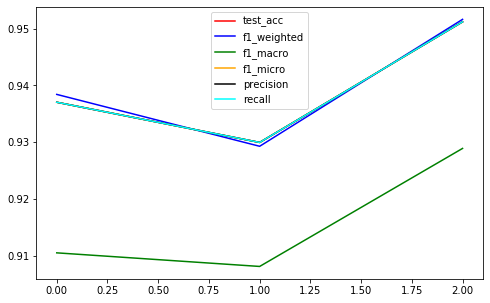

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

plt.plot(testacc_per_level, color='red', label='test_acc')
plt.plot(f1_weighted_per_level, color='blue', label='f1_weighted')
plt.plot(f1_macro_per_level, color='green', label='f1_macro')
plt.plot(f1_micro_per_level, color='orange', label='f1_micro')
plt.plot(precision_per_level, color='black', label='precision')
plt.plot(recall_per_level, color='cyan', label='recall')
plt.legend()
plt.show()

In [53]:
print("Mean F1 weighted score: ", np.mean(f1_weighted_per_level))
print("Mean F1 macro score: ", np.mean(f1_macro_per_level))
print("Mean F1 micro score: ", np.mean(f1_micro_per_level))
print("Mean test accuracy score: ", np.mean(testacc_per_level))
print("Mean precision: ", np.mean(precision_per_level))
print("Mean recall: ", np.mean(recall_per_level))

Mean F1 weighted score:  0.9397750400418925
Mean F1 macro score:  0.9158703243680885
Mean F1 micro score:  0.9393966025604442
Mean test accuracy score:  0.9393966025604442
Mean precision:  0.9393966025604442
Mean recall:  0.9393966025604442
